# USED CAR PRICE PREDICTION

Here, I have built a machine learning model for predicting the prices of pre-owned cars by using linear regression. The dataset contains details of about 50,000 cars sold or in process of selling.

### Importing libraries

To start with, I have used numpy and pandas libraries. For visualization, I have used the seaborn package and for implementing the machine learning model, I have used the sklearn library.

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

To split the available dataset for testing and training, I am using the train_test_split method.

In [4]:
from sklearn.model_selection import train_test_split

Next, I am importing the machine learning algorithm and a performance metric to evaluate my model.

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
from sklearn.metrics import mean_squared_error

### Importing data

In [7]:
car_df=pd.read_csv('C:/Users/DEBDUTTA/Downloads/Python for Data Science/cars_sampled.csv')

The dataset is loaded. Now, I will take a glimpse of the data using the head() and info() methods before I actually start processing and visualizing it.

In [8]:
car_df.head(20)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,30/03/2016 13:51,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,30/03/2016 0:00,20257,7/4/2016 4:44
1,7/3/2016 9:54,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,7/3/2016 0:00,88045,26/03/2016 13:17
2,1/4/2016 0:57,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,31/03/2016 0:00,27449,1/4/2016 8:40
3,19/03/2016 17:50,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,19/03/2016 0:00,34537,7/4/2016 4:44
4,16/03/2016 14:51,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,16/03/2016 0:00,55270,1/4/2016 23:18
5,2/4/2016 12:51,VW_Passat_35i_Facelift_Limousine_TÜV_Neu,private,offer,988,test,limousine,1995,manual,90,passat,150000,2,petrol,volkswagen,no,2/4/2016 0:00,26826,2/4/2016 12:51
6,3/4/2016 11:06,Opel_astra,private,offer,400,test,station wagon,1996,manual,0,astra,150000,5,petrol,opel,NaN,3/4/2016 0:00,56422,6/4/2016 16:47
7,24/03/2016 15:52,Mercedes_Benz_CLK_Coupe_200,private,offer,1399,test,coupe,1997,manual,136,clk,150000,11,petrol,mercedes_benz,no,24/03/2016 0:00,13353,27/03/2016 12:45
8,28/03/2016 14:40,Vectra_C_Caravan_1_8_Edition_Facelift_m_AHK_In...,private,offer,4680,test,station wagon,2005,manual,122,vectra,150000,12,petrol,opel,no,28/03/2016 0:00,28307,6/4/2016 18:19
9,5/4/2016 11:38,Skoda_Octavia_2.0_TDI_DSG_Elegance,private,offer,8340,test,limousine,2005,automatic,140,octavia,125000,4,diesel,skoda,no,5/4/2016 0:00,16761,5/4/2016 11:38


In [9]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50001 non-null  object
 1   name                 50001 non-null  object
 2   seller               50001 non-null  object
 3   offerType            50001 non-null  object
 4   price                50001 non-null  int64 
 5   abtest               50001 non-null  object
 6   vehicleType          44813 non-null  object
 7   yearOfRegistration   50001 non-null  int64 
 8   gearbox              47177 non-null  object
 9   powerPS              50001 non-null  int64 
 10  model                47243 non-null  object
 11  kilometer            50001 non-null  int64 
 12  monthOfRegistration  50001 non-null  int64 
 13  fuelType             45498 non-null  object
 14  brand                50001 non-null  object
 15  notRepairedDamage    40285 non-null  object
 16  date

I can see that the dataset contains 50001 rows with no missing values. But is that really the case?! We will deep dive into the dataset and check that later on. There are a total of 19 attributes (out of which 6 are of integer type, the rest being object type). Our taget variable is 'price' in this case.

### Exploratory Data Analysis

Let's obtain the descriptive statistics of the numerical variables and then, consider the categorical variables for the same.

In [10]:
summary_num=car_df.describe()
print(summary_num)

              price  yearOfRegistration       powerPS      kilometer  \
count  5.000100e+04        50001.000000  50001.000000   50001.000000   
mean   6.559865e+03         2005.544229    116.496130  125613.687726   
std    8.581847e+04          122.991832    230.567709   40205.234483   
min    0.000000e+00         1000.000000      0.000000    5000.000000   
25%    1.150000e+03         1999.000000     69.000000  125000.000000   
50%    2.950000e+03         2003.000000    105.000000  150000.000000   
75%    7.190000e+03         2008.000000    150.000000  150000.000000   
max    1.234568e+07         9999.000000  19312.000000  150000.000000   

       monthOfRegistration    postalCode  
count         50001.000000  50001.000000  
mean              5.743725  50775.216696  
std               3.711345  25743.701933  
min               0.000000   1067.000000  
25%               3.000000  30559.000000  
50%               6.000000  49504.000000  
75%               9.000000  71404.000000  
max    

Figures are too big! Let's just round them off upto 3 decimals.

In [11]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
car_df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


In [12]:
summary_cat=car_df.describe(include="O")
print(summary_cat)

           dateCrawled      name   seller offerType abtest vehicleType  \
count            50001     50001    50001     50001  50001       44813   
unique           12039     38766        2         2      2           8   
top     3/4/2016 16:57  BMW_318i  private     offer   test   limousine   
freq                15        90    49999     49998  25869       13041   

       gearbox  model fuelType       brand notRepairedDamage    dateCreated  \
count    47177  47243    45498       50001             40285          50001   
unique       2    248        7          40                 2             75   
top     manual   golf   petrol  volkswagen                no  3/4/2016 0:00   
freq     36732   3972    30214       10646             35337           1976   

             lastSeen  
count           50001  
unique          10413  
top     6/4/2016 5:46  
freq              107  


### Data Wrangling

Let us, at first, remove the insignificant variables from the dataset. For that, we need to create a column containing those insignificant variables and drop that column from the dataset.

In [13]:
col=['name','dateCrawled','dateCreated','postalCode','lastSeen']
cars=car_df.drop(columns=col, axis=1)

Glimpse of the first 10 observations of the dataset, considering this change.

In [14]:
cars.head(10)

,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN
1,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no
2,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN
3,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no
4,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no
5,private,offer,988,test,limousine,1995,manual,90,passat,150000,2,petrol,volkswagen,no
6,private,offer,400,test,station wagon,1996,manual,0,astra,150000,5,petrol,opel,NaN
7,private,offer,1399,test,coupe,1997,manual,136,clk,150000,11,petrol,mercedes_benz,no
8,private,offer,4680,test,station wagon,2005,manual,122,vectra,150000,12,petrol,opel,no
9,private,offer,8340,test,limousine,2005,automatic,140,octavia,125000,4,diesel,skoda,no


Removing date, time, postal code and car name related details from the dataset leaves us with a lot of duplicate records. Let's remove them.

In [15]:
cars.drop_duplicates(keep='first',inplace=True)
cars

,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN
1,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no
2,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN
3,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no
4,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,private,request,0,test,bus,2005,NaN,0,transporter,150000,0,NaN,volkswagen,NaN
49997,private,request,19999,control,NaN,1990,NaN,0,golf,5000,0,NaN,volkswagen,NaN
49998,private,request,0,test,coupe,2004,manual,0,3er,150000,1,petrol,bmw,no
49999,commercial,offer,100,control,station wagon,2000,manual,0,megane,150000,8,petrol,renault,NaN


Let's deep dive into the dataset for checking on missing values.

In [16]:
cars.isnull().sum()

seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5152
yearOfRegistration        0
gearbox                2765
powerPS                   0
model                  2730
kilometer                 0
monthOfRegistration       0
fuelType               4467
brand                     0
notRepairedDamage      9640
dtype: int64

The 'vehicleType', 'gearbox', 'model', 'fuelType' and 'notRepairedDamage' variables contain 5152, 2765, 2730, 4467 and 9640 missing values, respectively.

Since the dataset is huge, better to delete irrelevant entries (if any) from the dataset before heading further into our analysis. So, let's just fix a workable data range for better representation.

In [17]:
print(np.unique(cars['seller']))
print(np.unique(cars['offerType']))
print(np.unique(cars['price']))
print(np.unique(cars['yearOfRegistration']))

['commercial' 'private']
['offer' 'request']
[       0        1        2 ...  9999999 10010011 12345678]
[1000 1255 1500 1910 1928 1929 1933 1934 1936 1938 1940 1941 1943 1945
 1947 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962
 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976
 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990
 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004
 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018
 2019 2222 2900 3000 3500 3800 5000 6000 7500 7800 8500 8888 9999]


In [18]:
print(np.unique(cars['abtest']))
print(np.unique(cars['monthOfRegistration']))
print(np.unique(cars['powerPS']))
print(np.unique(cars['brand']))
print(np.unique(cars['kilometer']))

['control' 'test']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12]
[    0     1     2     3     4     5     6     7     9    10    11    12
    13    14    15    16    18    19    20    22    23    24    26    27
    29    30    31    32    33    34    35    36    37    38    39    40
    41    42    43    44    45    46    47    48    49    50    51    52
    53    54    55    56    57    58    59    60    61    62    63    64
    65    66    67    68    69    70    71    72    73    74    75    76
    77    78    79    80    81    82    83    84    85    86    87    88
    89    90    91    92    93    94    95    96    97    98    99   100
   101   102   103   104   105   106   107   108   109   110   111   112
   113   114   115   116   117   118   119   120   121   122   123   124
   125   126   127   128   129   130   131   132   133   134   135   136
   137   138   139   140   141   142   143   144   145   146   147   148
   149   150   151   152   154   155   156   157   158   159   1

Checking on most of the variables, we find that 'price' ranges from '0' to '12345678', 'yearOfRegistration' ranges from '1000' to '9999', and 'powerPS' ranges from '0' to '19312'. Now, the year in which a car was registered cannot be in future, so we would put upper limit to '2019'. To determine the lower limit, we will check on the year wise count.

In [19]:
yearwise_count=cars['yearOfRegistration'].value_counts().sort_index()
yearwise_count.head(60)

1000      6
1255      1
1500      2
1910     14
1928      1
1929      1
1933      1
1934      1
1936      2
1938      1
1940      1
1941      1
1943      2
1945      2
1947      2
1950      4
1951      4
1952      3
1953      2
1954      1
1955      6
1956      7
1957      5
1958      4
1959      5
1960     32
1961      7
1962      6
1963     11
1964     16
1965     11
1966     13
1967     18
1968      7
1969     25
1970     55
1971     27
1972     39
1973     17
1974     24
1975     21
1976     31
1977     28
1978     49
1979     49
1980     77
1981     32
1982     39
1983     57
1984     49
1985    110
1986     53
1987     80
1988    132
1989    197
1990    395
1991    408
1992    391
1993    455
1994    622
Name: yearOfRegistration, dtype: int64

Since .value_counts() sorts data on the basis of counts, I have used .sort_index() operator to sort the 'yearOfRegistration' variable on the basis of years instead. It should be ideal if I set the lower limit at '1960' because we can see that the frequency of each of the years before 1960 is far too less.

Let's detemine the limits for 'price' and 'powerPS'.

In [20]:
price_count=cars['price'].value_counts().sort_index()
price_count.head(60)

0      1415
1       172
2         1
3         1
5         4
7         1
8         2
10        5
11        1
12        1
14        1
15        8
20        6
21        1
25        5
26        1
30        7
35        4
39        1
40        3
45        6
50       41
55        3
60        7
65        1
70        2
75        9
77        1
80       12
85        3
90        5
95        2
98        1
99       15
100     145
101       1
110       2
111       3
120      31
121       1
122       1
125       6
129       2
130      11
135       2
139       2
140       5
145       2
149       5
150     183
155       1
156       1
159       1
160       9
170      13
175       8
180      35
185       2
189       4
190      18
Name: price, dtype: int64

For 1415 number of records, price of the car is '0'. This does not make any sense. Ignoring this, if we look at the prices of cars below Rs.100, we find that their individual fequencies are insignificant. The range is huge and we need to tweak it down for obtaining better prediction results. We can set the lower limit for 'price' variable at '100'.

In [21]:
price_count.tail(60)

95000       4
95964       1
98500       1
99900       1
99990       1
99999       1
103990      1
103999      1
104900      1
105000      2
107000      1
108000      1
109000      1
115000      1
115900      1
116000      1
120000      1
120911      1
122500      1
123456      2
125000      1
129900      1
130000      1
134900      1
138000      1
139000      2
149000      1
155000      1
155500      1
163500      1
163991      1
165000      1
169999      1
171000      1
175000      1
179999      1
189981      1
205000      1
214800      1
225000      1
230000      2
239000      1
249000      1
250000      1
257500      1
260000      1
270000      1
300000      1
370000      1
395000      1
485000      1
487000      1
619000      1
700000      1
999999      1
1250000     1
2795000     1
9999999     1
10010011    1
12345678    1
Name: price, dtype: int64

<AxesSubplot:xlabel='price', ylabel='Count'>

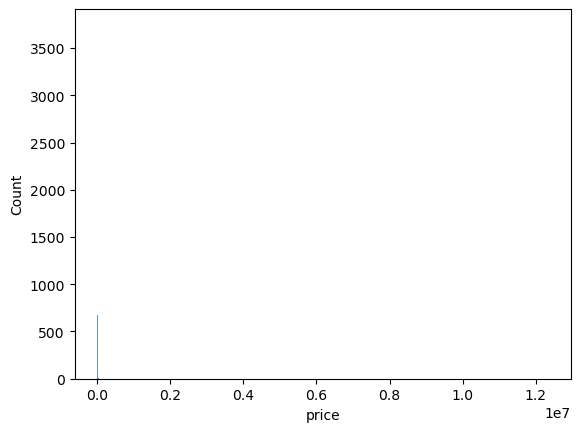

In [22]:
sns.histplot(cars['price'])

We can set the upper limit for 'price' at '100000'. Beyond this, the count for used car sell is insignificant.

In [23]:
power_count=cars['powerPS'].value_counts().sort_index()
power_count.head(60)

0     5533
1        3
2        2
3        2
4        4
5       17
6        2
7        1
9        1
10       2
11       4
12       6
13       1
14       6
15       3
16       1
18       9
19       2
20       1
22       1
23       3
24       5
26      46
27       5
29       2
30       7
31       1
32       2
33       5
34      29
35       3
36       1
37      11
38       4
39      18
40      39
41      51
42       1
43      24
44      65
45     388
46       5
47       4
48      12
49       2
50     580
51       8
52      41
53      27
54     755
55     285
56      34
57      19
58     488
59      41
60    2149
61     151
62      15
63      53
64     212
Name: powerPS, dtype: int64

We set the lower limit for 'powerPS' variable which is refering to the horsepowr of used cars at '50'.

In [24]:
power_count.tail(85)

481       1
483       1
487       4
489       3
500      22
         ..
15033     1
16011     1
16312     1
19211     1
19312     1
Name: powerPS, Length: 85, dtype: int64

The average horsepower for standard cars is somewhere around 180-240. So, taking into consideration records beyond 500 is needless. We can stick upto '500' in this case.

Generating the workable range of data:

In [25]:
cars = cars[
        (cars.yearOfRegistration <= 2019) 
      & (cars.yearOfRegistration >= 1960) 
      & (cars.price >= 100) 
      & (cars.price <= 100000) 
      & (cars.powerPS >= 50) 
      & (cars.powerPS <= 500)]

In [26]:
cars

,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN
1,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no
2,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN
3,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no
4,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49990,private,offer,13500,control,station wagon,2012,automatic,163,others,80000,3,NaN,chevrolet,no
49991,private,offer,10900,test,limousine,2004,manual,231,x_reihe,150000,8,petrol,bmw,no
49992,private,offer,790,test,limousine,1998,manual,82,astra,150000,9,diesel,opel,no
49993,private,offer,830,test,small car,1999,manual,60,clio,125000,8,petrol,renault,no


A quick recap: The original dataset had 19 variables with a huge range of data containing 50001 records. We have, so far, removed 5 insignificant variables, the duplicate values present in the dataset and tried to fix a workable range of data by ignoring the outiers. Now, we are left with 14 variables and 42058 records (including missing values).

### Cross tables and data visualization

Let's check how all the attributes are affecting the target variable 'price' by creating cross tables and graphs.

In [27]:
pd.crosstab(cars['seller'],columns='count',normalize=True)

col_0,count
seller,
private,1.000


Interpretation: 100% of the used car data corresponds to "private" seller at this stage. Any observation corresponding to "commercial" seller is not in our dataset. Hence, we can drop the variable.

In [28]:
pd.crosstab(cars['offerType'],columns='count',normalize=True)

col_0,count
offerType,
offer,1.000


Interpretation: 100% of the used car data corresponds to type "offer" at this stage. Any "request" for sell car is no longer part of our dataset. Hence, we can consider this variable insignificant and drop it.

In [29]:
pd.crosstab(cars['abtest'],columns='count',normalize=True)

col_0,count
abtest,
control,0.483
test,0.517


Interpretation: The 'abtest' variable is more or less equally distributed across the dataset. 48.3% of the used car data corresponds to "control" while the remaining 51.7% of the data corresponds to "test".

<AxesSubplot:xlabel='abtest', ylabel='price'>

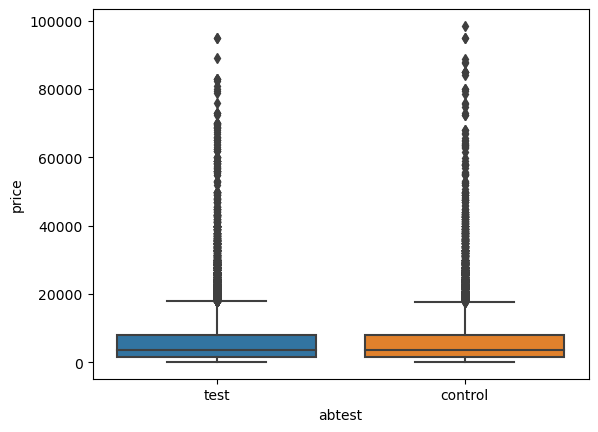

In [30]:
sns.boxplot(x= 'abtest',y='price',data=cars)

It is ideal to remove variable 'abtest' from our analysis because the effect of both the categories "test" and "control" on 'price' are more or less same. They seem to have same median on price and we can't infer much from this plot.

In [31]:
pd.crosstab(cars['vehicleType'],columns='count',normalize=True)

col_0,count
vehicleType,
bus,0.092
cabrio,0.070
coupe,0.057
limousine,0.298
others,0.008
small car,0.224
station wagon,0.205
suv,0.046


Interpretation: We see that approximately 30% of the used car data corresponds to "limousine" type of variable while 22% correspond to small cars and around 21% to station wagon. Among the remaining, only 4.6% of the pre-owned cars are of SUV type.

<AxesSubplot:xlabel='price', ylabel='vehicleType'>

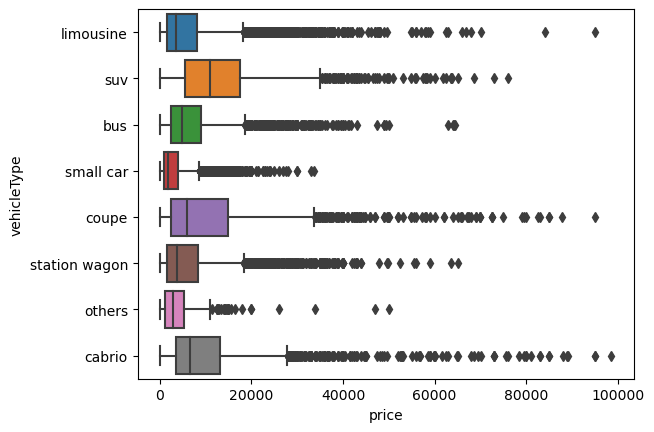

In [32]:
sns.boxplot(x= 'price',y='vehicleType',data=cars)

Interpretation: 'vehicleType' is affecting price. Hence, we will continue with this variable without dropping it.

In [33]:
pd.crosstab(cars['gearbox'],columns='count',normalize=True)

col_0,count
gearbox,
automatic,0.225
manual,0.775


Interpretation: Most of the cars are manually operated (77.5%).

<AxesSubplot:xlabel='gearbox', ylabel='price'>

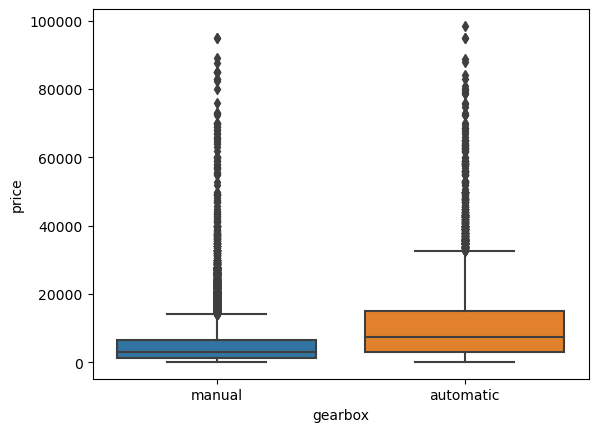

In [34]:
sns.boxplot(x= 'gearbox',y='price',data=cars)

Interpretation: The median of automatic cars for price is higher than the median of manual cars for price. In fact, the lowest price range for automatic cars is more or less similar to the median price of manually operated cars. Both the categories affect price in different way, so, we will consider this variable in our analysis.

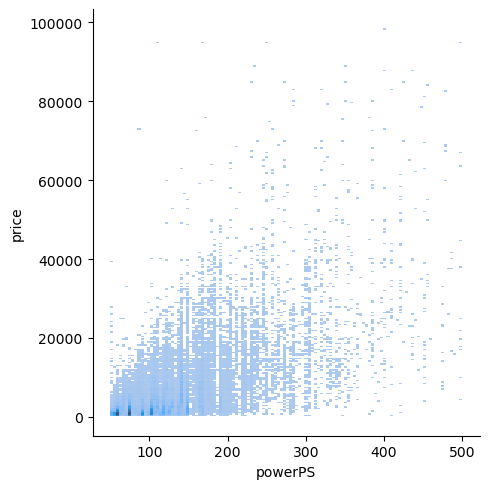

In [35]:
sns.displot(x= 'powerPS',y='price',data=cars)

Interpretation: Most of the used cars having horsepower somewhere around 50-250 are priced around 20000. With 'powerPS' increasing, 'price' of used cars is increasing. We have alreay fixed a workable range for this variable and would continue to take this into account for further analysis.

In [36]:
pd.crosstab(cars['model'],columns='count',normalize=True)

col_0,count
model,
100,0.001
145,0.000
147,0.001
156,0.002
159,0.000
...,...
yaris,0.003
yeti,0.001
ypsilon,0.001


A variety of car models are present in our dataset. So, we will consider this variable.

In [37]:
pd.crosstab(cars['kilometer'],columns='count',normalize=True)

col_0,count
kilometer,
5000,0.011
10000,0.005
20000,0.015
30000,0.017
40000,0.019
50000,0.022
60000,0.026
70000,0.028
80000,0.032


Interpretation: Most of the used cars feature 150,000 kilometers run, representing 64% approximately.

<AxesSubplot:xlabel='kilometer', ylabel='price'>

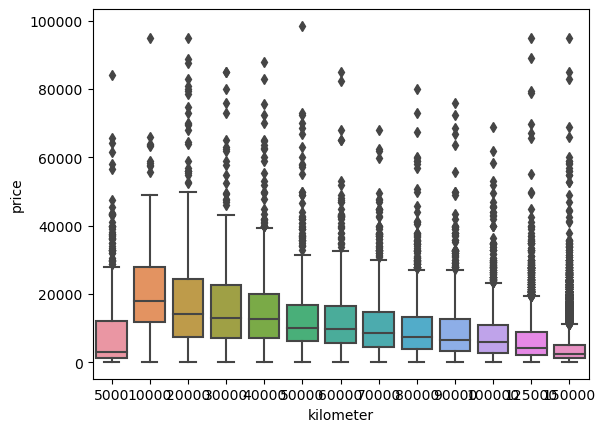

In [38]:
sns.boxplot(x= 'kilometer',y='price',data=cars)

Interpretation: As kilometer run increases for an used car, its price level decreases. The more a car is driven in its lifetime, the more wear and tear the car is likely to have experienced and hence less is its price. However, the only exception here is for the cars run only upto 5,000 kms which has a lower price range.

Since variable 'kilometer' is affecting price, we will consider it in our analysis.

In [39]:
pd.crosstab(cars['fuelType'],columns='count',normalize=True)

col_0,count
fuelType,
cng,0.002
diesel,0.323
electro,0.000
hybrid,0.001
lpg,0.017
other,0.000
petrol,0.657


Interpretation: Approximately 66% of the used cars run on petrol and 32% run on diesel.

<AxesSubplot:xlabel='fuelType', ylabel='price'>

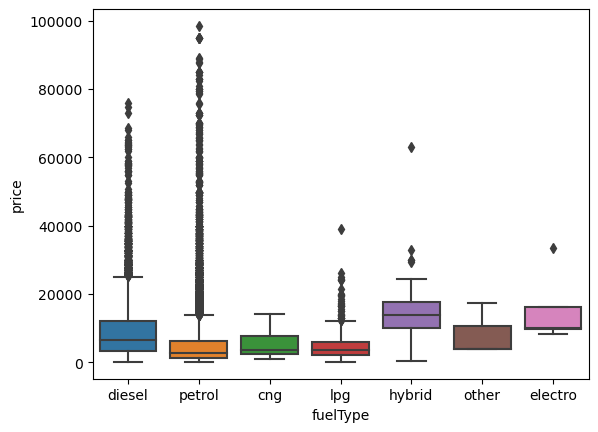

In [40]:
sns.boxplot(x= 'fuelType',y='price',data=cars)

Interpretation: Different types of fuel are affecting the used car price in different ways. The 'fuelType' variable seems significant for our price analysis. We will consider this as well.

In [41]:
pd.crosstab(cars['brand'],columns='count',normalize=True)

col_0,count
brand,
alfa_romeo,0.006
audi,0.095
bmw,0.116
chevrolet,0.005
chrysler,0.004
citroen,0.014
dacia,0.003
daewoo,0.001
daihatsu,0.001


A variety of car brands are present in our dataset with 11.6%, 10.3% and 9.8% of the used cars being from brands bmw, mercedes_benz, and opel, respectively. So, we will consider this variable for analysis.

In [42]:
pd.crosstab(cars['notRepairedDamage'],columns='count',normalize=True)

col_0,count
notRepairedDamage,
no,0.892
yes,0.108


It is obvious that the used cars will have some damage. The "notrepaireddamage" variable captures whether the damage on a car has been repaired or not.

Interpretation: We see that 10.8% of the second hand cars are not repaired from their damage while 89.2% of them are repaired from their damage.

<AxesSubplot:xlabel='notRepairedDamage', ylabel='price'>

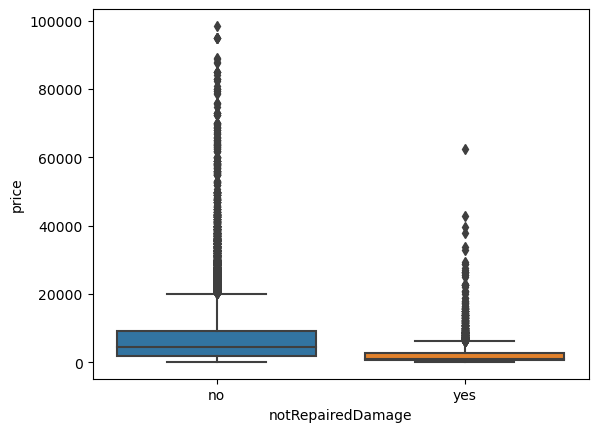

In [43]:
sns.boxplot(x= 'notRepairedDamage',y='price',data=cars)

Interpretation: The second hand cars which have not been repaired from damage, that is, the 'yes' category are priced far low compared to those for which damage has been taken care of. We will consider this significant variable in our analysis.

Now, let us create a column containing the insignificant variables to drop them from the dataset.

In [44]:
col=['seller','offerType','abtest']
cars=cars.drop(columns=col, axis=1)

A glimpse of the dataset after incorporating the above change.

In [45]:
cars

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,4450,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN
1,13299,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no
2,3200,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN
3,4500,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no
4,18750,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no
...,...,...,...,...,...,...,...,...,...,...,...
49990,13500,station wagon,2012,automatic,163,others,80000,3,NaN,chevrolet,no
49991,10900,limousine,2004,manual,231,x_reihe,150000,8,petrol,bmw,no
49992,790,limousine,1998,manual,82,astra,150000,9,diesel,opel,no
49993,830,small car,1999,manual,60,clio,125000,8,petrol,renault,no


Another quick recap: The original dataset had 19 variables with a huge range of data containing 50001 records. After removing the insignificant variables, duplicate records and fixing a workable range of data, we are left with 11 variables and 42023 records (including missing values).

### Linear Regression

I am making two approaches to build the linear regression model. In my first approach, I am proceeding by removing the missing values from the dataset while in my second approach, I am imputing them with some average.

#### First Approach:

In [46]:
cars_omit=cars.dropna(axis=0)
cars_omit

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
1,13299,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no
3,4500,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no
4,18750,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no
5,988,limousine,1995,manual,90,passat,150000,2,petrol,volkswagen,no
7,1399,coupe,1997,manual,136,clk,150000,11,petrol,mercedes_benz,no
...,...,...,...,...,...,...,...,...,...,...,...
49989,990,limousine,1999,manual,136,omega,150000,2,petrol,opel,no
49991,10900,limousine,2004,manual,231,x_reihe,150000,8,petrol,bmw,no
49992,790,limousine,1998,manual,82,astra,150000,9,diesel,opel,no
49993,830,small car,1999,manual,60,clio,125000,8,petrol,renault,no


We have removed 9,561 data entries containing NaN values.

Now, one-hot encoding the data to turn categorical variables into a binary vector representation.

In [47]:
cars_omit=pd.get_dummies(cars_omit,drop_first=True) 
cars_omit

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,vehicleType_cabrio,vehicleType_coupe,vehicleType_limousine,vehicleType_others,vehicleType_small car,...,brand_saab,brand_seat,brand_skoda,brand_smart,brand_subaru,brand_suzuki,brand_toyota,brand_volkswagen,brand_volvo,notRepairedDamage_yes
1,13299,2005,163,150000,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,4500,2006,86,60000,12,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4,18750,2008,185,150000,11,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,988,1995,90,150000,2,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
7,1399,1997,136,150000,11,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49989,990,1999,136,150000,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
49991,10900,2004,231,150000,8,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
49992,790,1998,82,150000,9,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
49993,830,1999,60,125000,8,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Next, let us consider two variables 'x' and 'y' to store the input values and output values into them. We drop the target variable 'price' from the dataset and store the input values into 'x'. We extract the output values from the 'price' variable and store them into 'y'.

In [48]:
x = cars_omit.drop(['price'], axis='columns', inplace=False)
y = cars_omit['price']

Before going ahead with our analysis, if we plot histograms for 'price' variable and the 'logarithmic value of price', we find that the second one gives better distribution (a bell shaped curve).

array([[<AxesSubplot:title={'center':'1. Before'}>,
        <AxesSubplot:title={'center':'2. After'}>]], dtype=object)

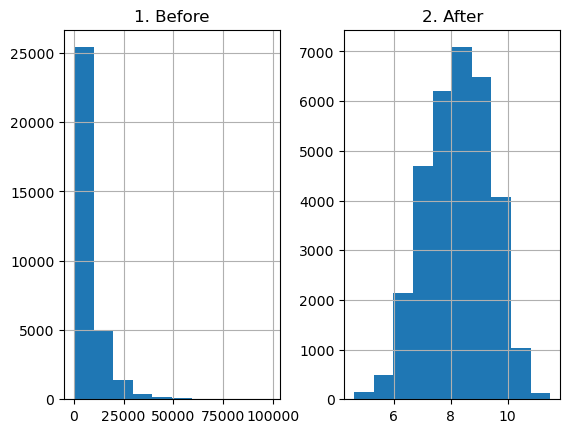

In [49]:
prices = pd.DataFrame({"1. Before":y, "2. After":np.log(y)})
prices.hist()

So, it is better to regress log of price with the input features rather than regressing 'price' with the input features. Hence, transforming the y output variable now.

In [50]:
y = np.log(y)

Let's split the dataset into train set and test set, reserving 30% of the data set for testing the model.

In [51]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(22723, 299) (9739, 299) (22723,) (9739,)


The train set has 22723 data points while the test set has 9739 data points.

Let's fit the model.

In [52]:
lr = LinearRegression(fit_intercept=True)
model=lr.fit(X_train,y_train)
print(model)

LinearRegression()


Let's predict the fitted model onto the test data set and evaluate its performance.

In [53]:
prediction = lr.predict(X_test)
print(prediction)

[8.36660042 7.88125186 9.14563361 ... 7.3541947  8.41157611 7.00630474]


In [54]:
lin_mse = mean_squared_error(y_test, prediction)
print(lin_mse)

0.27625482898243253


In [55]:
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

0.5255994948460592


This model has a root mean square error (RMSE) value of 0.53. We will build another model with imputed data, find its RMSE and compare the two.

Now, we calculate the goodness of fit (R2) on the train set and test set of this model.

In [56]:
r2_lin_test=model.score(X_test,y_test)
r2_lin_train=model.score(X_train,y_train)
print(r2_lin_test,r2_lin_train)

0.781515729964257 0.7862837160563041


The train set explains variability (78.6%) in y (that is, price) slight better than that of the test set (78.2%). This implies that the fit is good.

#### Second Approach:

In [57]:
cars_imputed = cars.apply(lambda x:x.fillna(x.median()) 
                          if x.dtype=='float' else
                  x.fillna(x.value_counts().index[0]))

In [58]:
cars_imputed

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,4450,limousine,2003,manual,150,3er,150000,3,diesel,bmw,no
1,13299,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no
2,3200,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,no
3,4500,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no
4,18750,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no
...,...,...,...,...,...,...,...,...,...,...,...
49990,13500,station wagon,2012,automatic,163,others,80000,3,petrol,chevrolet,no
49991,10900,limousine,2004,manual,231,x_reihe,150000,8,petrol,bmw,no
49992,790,limousine,1998,manual,82,astra,150000,9,diesel,opel,no
49993,830,small car,1999,manual,60,clio,125000,8,petrol,renault,no


We have imputed the 9,561 data points having missing values instead of removing them. For numerical data type, we have filled missing values with median and for categorical data type, we have used mode to fill in the missing values. 

Now, one-hot encoding the data to turn categorical variables into a binary vector representation.

In [59]:
cars_imputed=pd.get_dummies(cars_imputed,drop_first=True)
cars_imputed

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,vehicleType_cabrio,vehicleType_coupe,vehicleType_limousine,vehicleType_others,vehicleType_small car,...,brand_seat,brand_skoda,brand_smart,brand_sonstige_autos,brand_subaru,brand_suzuki,brand_toyota,brand_volkswagen,brand_volvo,notRepairedDamage_yes
0,4450,2003,150,150000,3,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,13299,2005,163,150000,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3200,2003,101,150000,11,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4500,2006,86,60000,12,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,18750,2008,185,150000,11,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49990,13500,2012,163,80000,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49991,10900,2004,231,150000,8,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
49992,790,1998,82,150000,9,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
49993,830,1999,60,125000,8,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Again, I am considering two variables 'x1' and 'y1' to store the input values and output values into them.

In [60]:
x1 = cars_imputed.drop(['price'], axis='columns', inplace=False)
y1 = cars_imputed['price']

Plotting histograms for 'price' variable and the 'logarithmic value of price', to check which one gives better distribution (a bell shaped curve).

array([[<AxesSubplot:title={'center':'1. Before'}>,
        <AxesSubplot:title={'center':'2. After'}>]], dtype=object)

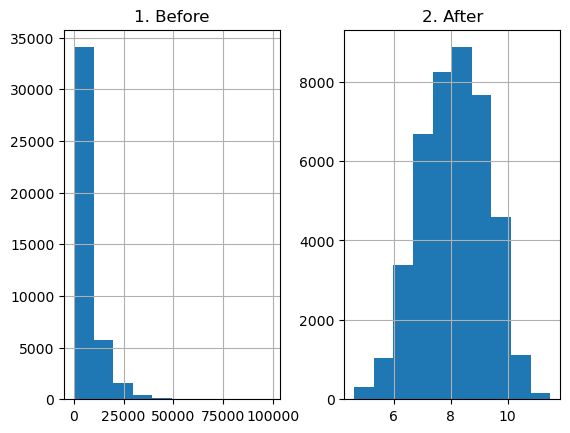

In [61]:
prices = pd.DataFrame({"1. Before":y1, "2. After":np.log(y1)})
prices.hist()

We find that it is better to regress log of price with the input features rather than regressing 'price' with the input features. Hence, transforming the y1 output variable now.

In [62]:
y1 = np.log(y1)

Splitting the dataset into train set and test set, reserving 30% of the data set for testing the model.

In [63]:
X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, random_state = 3)
print(X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape)

(29416, 302) (12607, 302) (29416,) (12607,)


The train set has 29416 data points while the test set has 12607 data points.

Let's fit the model.

In [64]:
lr1 = LinearRegression(fit_intercept=True)
model_1=lr.fit(X1_train,y1_train)
print(model_1)

LinearRegression()


We predict the fitted model onto the test data set and evaluate its performance.

In [65]:
prediction_1 = lr.predict(X1_test)
print(prediction_1)

[8.75828123 8.8729767  8.91446749 ... 7.54210865 7.97864521 7.5680507 ]


In [66]:
lin_mse_1 = mean_squared_error(y1_test, prediction_1)
print(lin_mse_1)

0.396376907567499


In [67]:
lin_rmse_1 = np.sqrt(lin_mse_1)
print(lin_rmse_1)

0.6295847103984491


This model has a RMSE value of 0.63 while the linear regression model built by ommiting missing values had a RMSE value of 0.53.

Next, we calculate the R2 value on the train set and test set.

In [68]:
r2_lin_test_1=model.score(X1_test,y1_test)
r2_lin_train_1=model.score(X1_train,y1_train)
print(r2_lin_test_1,r2_lin_train_1)

0.7094323032623122 0.7139521253924985


Here also, the train set explains variability (71.4%) in y (that is, price) slight better than that of the test set (70.9%).

#### Final Output:

In [69]:
print("Metrics for the linear regression model built from data where missing values were omitted:")
print("R squared value for train set =  %s"% r2_lin_train)
print("R squared value for test set =  %s"% r2_lin_test)
print("RMSE value for test =  %s"% lin_rmse)
print("\n")
print("Metrics for the linear regression model built from data where missing values were imputed:")
print("R squared value for train set =  %s"% r2_lin_train_1)
print("R squared value for test set =  %s"% r2_lin_test_1)
print("RMSE value for test from Linear Regression =  %s"% lin_rmse_1)

Metrics for the linear regression model built from data where missing values were omitted:
R squared value for train set =  0.7862837160563041
R squared value for test set =  0.781515729964257
RMSE value for test =  0.5255994948460592


Metrics for the linear regression model built from data where missing values were imputed:
R squared value for train set =  0.7139521253924985
R squared value for test set =  0.7094323032623122
RMSE value for test from Linear Regression =  0.6295847103984491


#### RMSE is lower for the model where missing values were omitted. In other words, the weighted average error between the predicted values and the actual values is lower for the first model than what it is for the second one. (0.53<0.63)

#### Also, R squared value is higher for the first model. This means, the predictor variables are explaining the variability in 'price' of used cars better in the first model than in the second one. (0.78>0.71)

#### Evidently, the model with ommission of missing values is more accurately predicting the values of response variable 'price' compared to the model with imputation of missing values.